In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tcae.compute_measures import heuristic_names

plt.style.use("dark_background")

In [2]:
df = pd.read_csv("heuristic_measures_stats.csv", names=heuristic_names)
df.head()

,inharmonicity,even_odd,sparse_rich,attack_rms,decay_rms,attack_time,decay_time,bass,mid,high_mid,high
guitar_acoustic_001-082-050,0.998496,0.657446,0.125390,0.016752,0.022363,0.003906,0.735352,0.025195,0.699160,0.298923,0.290331
guitar_electronic_035-062-127,0.072428,0.446736,0.294537,0.056601,0.045505,0.115234,0.707031,0.099256,0.580100,0.204046,0.160956
guitar_electronic_004-061-050,0.014475,0.304505,0.193736,0.015446,0.025341,0.008789,0.762695,0.173419,0.473571,0.094408,0.067155
guitar_electronic_009-059-100,0.915211,0.600819,0.148060,0.019320,0.011020,0.039062,0.712891,0.165928,0.386004,0.335238,0.319030
guitar_electronic_000-064-050,0.977150,0.325429,0.130925,0.031515,0.014182,0.008789,0.755859,0.122854,0.559962,0.151882,0.126747


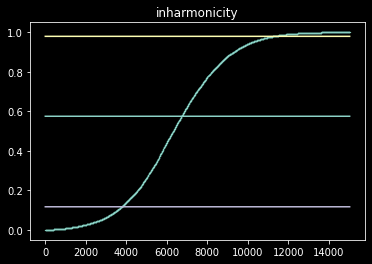

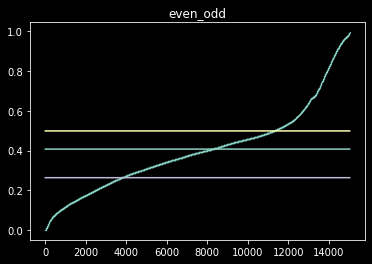

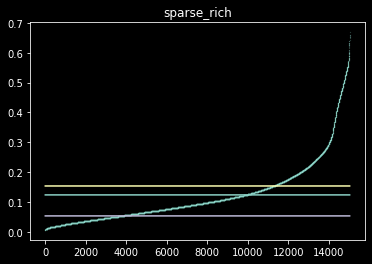

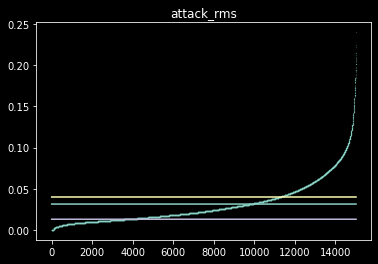

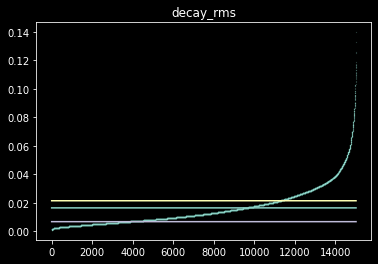

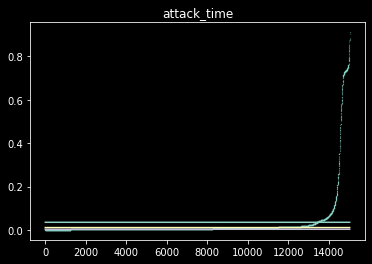

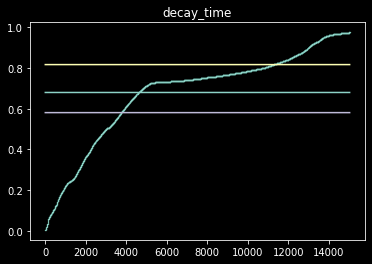

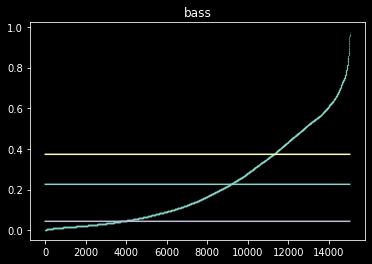

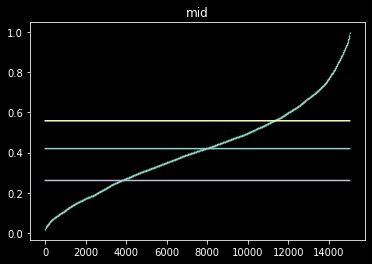

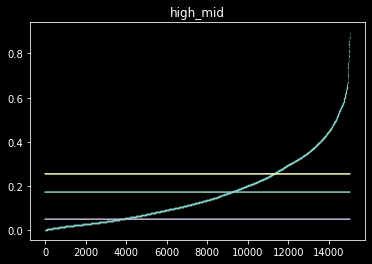

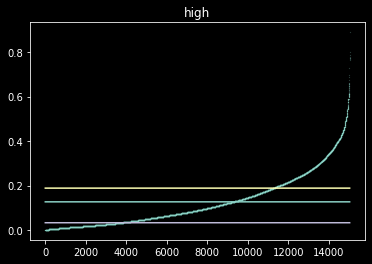

In [4]:
for name in heuristic_names:
    vals = list(sorted(df[name].values))
    mean = df[name].describe()["mean"]
    high_thres = df[name].describe()["75%"]
    low_thres = df[name].describe()["25%"]
    n = len(vals)

    plt.figure()
    plt.scatter(x=list(range(0, n)), y=vals,
                s=0.01)
    plt.plot([mean] * n)
    plt.plot([high_thres] * n)
    plt.plot([low_thres] * n)
    plt.title(name)
    plt.show()

## Correlation w Heuristic Measures, Pitch and Velocity

In [5]:
def get_pitch_and_velocity(name: str):
    _, pitch, velocity = name.split("-")
    pitch = int(pitch) / 127
    velocity = int(velocity) / 127
    return pitch, velocity

In [6]:
for i, row in df.iterrows():
    pitch, velocity = get_pitch_and_velocity(i)
    df.loc[i, "pitch"] = pitch
    df.loc[i, "velocity"] = velocity

In [7]:
df.head()

,inharmonicity,even_odd,sparse_rich,attack_rms,decay_rms,attack_time,decay_time,bass,mid,high_mid,high,pitch,velocity
guitar_acoustic_001-082-050,0.998496,0.657446,0.125390,0.016752,0.022363,0.003906,0.735352,0.025195,0.699160,0.298923,0.290331,0.645669,0.393701
guitar_electronic_035-062-127,0.072428,0.446736,0.294537,0.056601,0.045505,0.115234,0.707031,0.099256,0.580100,0.204046,0.160956,0.488189,1.000000
guitar_electronic_004-061-050,0.014475,0.304505,0.193736,0.015446,0.025341,0.008789,0.762695,0.173419,0.473571,0.094408,0.067155,0.480315,0.393701
guitar_electronic_009-059-100,0.915211,0.600819,0.148060,0.019320,0.011020,0.039062,0.712891,0.165928,0.386004,0.335238,0.319030,0.464567,0.787402
guitar_electronic_000-064-050,0.977150,0.325429,0.130925,0.031515,0.014182,0.008789,0.755859,0.122854,0.559962,0.151882,0.126747,0.503937,0.393701


In [8]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')\
    .set_precision(2)

,inharmonicity,even_odd,sparse_rich,attack_rms,decay_rms,attack_time,decay_time,bass,mid,high_mid,high,pitch,velocity
inharmonicity,1.00,-0.02,0.15,0.25,0.26,-0.12,-0.23,-0.49,0.48,0.40,0.38,0.63,0.01
even_odd,-0.02,1.00,0.10,0.02,0.07,-0.03,0.05,-0.09,0.03,0.16,0.16,0.03,0.07
sparse_rich,0.15,0.10,1.00,0.43,0.69,0.25,-0.03,-0.48,0.18,0.76,0.72,0.30,0.11
attack_rms,0.25,0.02,0.43,1.00,0.68,-0.05,-0.09,-0.44,0.34,0.47,0.44,0.49,0.06
decay_rms,0.26,0.07,0.69,0.68,1.00,0.06,-0.09,-0.52,0.40,0.57,0.54,0.57,0.04
attack_time,-0.12,-0.03,0.25,-0.05,0.06,1.00,-0.33,-0.02,-0.07,0.11,0.09,-0.00,-0.02
decay_time,-0.23,0.05,-0.03,-0.09,-0.09,-0.33,1.00,0.21,-0.23,-0.16,-0.15,-0.28,0.06
bass,-0.49,-0.09,-0.48,-0.44,-0.52,-0.02,0.21,1.00,-0.80,-0.66,-0.63,-0.77,-0.08
mid,0.48,0.03,0.18,0.34,0.40,-0.07,-0.23,-0.80,1.00,0.35,0.33,0.76,-0.00
high_mid,0.40,0.16,0.76,0.47,0.57,0.11,-0.16,-0.66,0.35,1.00,0.98,0.55,0.17


In [9]:
cov = df.cov()
cov.style.background_gradient(cmap='coolwarm')\
    .set_precision(2)

,inharmonicity,even_odd,sparse_rich,attack_rms,decay_rms,attack_time,decay_time,bass,mid,high_mid,high,pitch,velocity
inharmonicity,0.16,-0.00,0.01,0.00,0.00,-0.01,-0.02,-0.04,0.04,0.02,0.02,0.03,0.00
even_odd,-0.00,0.05,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.01,0.00,0.00,0.00
sparse_rich,0.01,0.00,0.01,0.00,0.00,0.00,-0.00,-0.01,0.00,0.01,0.01,0.00,0.00
attack_rms,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00
decay_rms,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00
attack_time,-0.01,-0.00,0.00,-0.00,0.00,0.02,-0.01,-0.00,-0.00,0.00,0.00,-0.00,-0.00
decay_time,-0.02,0.00,-0.00,-0.00,-0.00,-0.01,0.05,0.01,-0.01,-0.01,-0.00,-0.01,0.00
bass,-0.04,-0.00,-0.01,-0.00,-0.00,-0.00,0.01,0.05,-0.04,-0.02,-0.02,-0.02,-0.00
mid,0.04,0.00,0.00,0.00,0.00,-0.00,-0.01,-0.04,0.04,0.01,0.01,0.02,-0.00
high_mid,0.02,0.01,0.01,0.00,0.00,0.00,-0.01,-0.02,0.01,0.02,0.02,0.01,0.01
